In [1]:
import pandas as pd
import numpy as np

In [2]:
total = pd.read_csv("realfinal.csv")

In [3]:
total = total.sort_index(ascending = False)
total = total.reset_index(drop=True)
total.drop(columns=total.columns[0], axis=1, inplace=True)
total = total.drop_duplicates()

In [4]:
total

,pitch_name,game_date,batter,pitcher,player_name,description,events,zone,stand,p_throws,...,plate_z,inning,pitch_number,home_team,away_team,inning_topbot,team,OBP,BABIP,ERA
0,5,2022-04-17,666185,676879,"Ashby, Aaron",S,NaN,3.0,2,1,...,2.94,1,1,MIL,NaN,Top,MIL,0.335,0.325,4.44
1,3,2022-04-17,666185,676879,"Ashby, Aaron",B,NaN,13.0,2,1,...,0.84,1,2,MIL,NaN,Top,MIL,0.335,0.325,4.44
2,3,2022-04-17,666185,676879,"Ashby, Aaron",S,NaN,4.0,2,1,...,2.27,1,3,MIL,NaN,Top,MIL,0.335,0.325,4.44
3,1,2022-04-17,666185,676879,"Ashby, Aaron",S,NaN,12.0,2,1,...,3.25,1,4,MIL,NaN,Top,MIL,0.335,0.325,4.44
4,3,2022-04-17,666185,676879,"Ashby, Aaron",G,field_out,14.0,2,1,...,2.33,1,5,MIL,NaN,Top,MIL,0.335,0.325,4.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305863,1,2022-10-05,672695,669203,"Burnes, Corbin",B,NaN,14.0,1,2,...,1.42,3,2,MIL,NaN,Top,MIL,0.261,0.259,2.94
305864,4,2022-10-05,672695,669203,"Burnes, Corbin",S,NaN,14.0,1,2,...,1.36,3,3,MIL,NaN,Top,MIL,0.261,0.259,2.94
305865,5,2022-10-05,672695,669203,"Burnes, Corbin",B,NaN,12.0,1,2,...,2.88,3,4,MIL,NaN,Top,MIL,0.261,0.259,2.94
305866,2,2022-10-05,672695,669203,"Burnes, Corbin",B,NaN,13.0,1,2,...,0.84,3,5,MIL,NaN,Top,MIL,0.261,0.259,2.94


In [5]:
total.columns

Index(['pitch_name', 'game_date', 'batter', 'pitcher', 'player_name',
       'description', 'events', 'zone', 'stand', 'p_throws', 'plate_x',
       'plate_z', 'inning', 'pitch_number', 'home_team', 'away_team',
       'inning_topbot', 'team', 'OBP', 'BABIP', 'ERA'],
      dtype='object')

In [6]:
total.drop(['events',"home_team","away_team",'inning_topbot'],axis=1,inplace=True)

In [7]:
total=total.fillna({'zone':15,'plate_x':4,'plate_z':10}) #기록되지않은 공을 예외로 처리

In [8]:
total

,pitch_name,game_date,batter,pitcher,player_name,description,zone,stand,p_throws,plate_x,plate_z,inning,pitch_number,team,OBP,BABIP,ERA
0,5,2022-04-17,666185,676879,"Ashby, Aaron",S,3.0,2,1,0.71,2.94,1,1,MIL,0.335,0.325,4.44
1,3,2022-04-17,666185,676879,"Ashby, Aaron",B,13.0,2,1,-1.29,0.84,1,2,MIL,0.335,0.325,4.44
2,3,2022-04-17,666185,676879,"Ashby, Aaron",S,4.0,2,1,-0.40,2.27,1,3,MIL,0.335,0.325,4.44
3,1,2022-04-17,666185,676879,"Ashby, Aaron",S,12.0,2,1,1.15,3.25,1,4,MIL,0.335,0.325,4.44
4,3,2022-04-17,666185,676879,"Ashby, Aaron",G,14.0,2,1,0.84,2.33,1,5,MIL,0.335,0.325,4.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305863,1,2022-10-05,672695,669203,"Burnes, Corbin",B,14.0,1,2,1.69,1.42,3,2,MIL,0.261,0.259,2.94
305864,4,2022-10-05,672695,669203,"Burnes, Corbin",S,14.0,1,2,0.09,1.36,3,3,MIL,0.261,0.259,2.94
305865,5,2022-10-05,672695,669203,"Burnes, Corbin",B,12.0,1,2,2.09,2.88,3,4,MIL,0.261,0.259,2.94
305866,2,2022-10-05,672695,669203,"Burnes, Corbin",B,13.0,1,2,-0.70,0.84,3,5,MIL,0.261,0.259,2.94


In [9]:
total[total["OBP"].isnull()] #두 데이터 간 선수 이름 표기 차이 때문에 생긴 null값을 직접 채워주기

,pitch_name,game_date,batter,pitcher,player_name,description,zone,stand,p_throws,plate_x,plate_z,inning,pitch_number,team,OBP,BABIP,ERA
131340,1,2022-04-10,660271,664353,"Urquidy, José",B,12.0,1,2,0.20,3.69,1,1,HOU,NaN,NaN,NaN
131341,1,2022-04-10,660271,664353,"Urquidy, José",S,2.0,1,2,-0.09,3.18,1,2,HOU,NaN,NaN,NaN
131342,1,2022-04-10,660271,664353,"Urquidy, José",S,3.0,1,2,0.39,3.22,1,3,HOU,NaN,NaN,NaN
131343,1,2022-04-10,660271,664353,"Urquidy, José",B,11.0,1,2,-0.42,5.61,1,4,HOU,NaN,NaN,NaN
131344,4,2022-04-10,660271,664353,"Urquidy, José",B,13.0,1,2,-1.41,2.00,1,5,HOU,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177405,3,2022-10-03,663624,621244,"Berríos, José",G,13.0,2,2,-0.55,1.53,6,5,TOR,NaN,NaN,NaN
177406,5,2022-10-03,683002,621244,"Berríos, José",G,4.0,1,2,-0.37,2.40,6,1,TOR,NaN,NaN,NaN
177407,3,2022-10-03,679631,621244,"Berríos, José",S,13.0,1,2,-0.86,1.32,6,1,TOR,NaN,NaN,NaN
177408,3,2022-10-03,679631,621244,"Berríos, José",S,14.0,1,2,0.22,1.30,6,2,TOR,NaN,NaN,NaN


In [10]:
lost_val = pd.DataFrame({"player_name":["Urquidy, José","Berríos, José"], "OBP":[0.292,0.340],"BABIP":[0.264,0.329],"ERA":[3.94,5.23]})

In [11]:
Ur_idx = total[total["player_name"]=="Urquidy, José"].index
Be_idx = total[total["player_name"]=="Berríos, José"].index

In [12]:
for i in range(len(Ur_idx)):
    total.loc[Ur_idx[i],"OBP"] = 0.292
    total.loc[Ur_idx[i],"BABIP"] = 0.264
    total.loc[Ur_idx[i],"ERA"] = 3.94

In [13]:
for i in range(len(Be_idx)):
    total.loc[Be_idx[i],"OBP"] =0.340
    total.loc[Be_idx[i],"BABIP"] = 0.329
    total.loc[Be_idx[i],"ERA"] = 5.23

In [14]:
def zonesequence(data):
    
    for i in range(len(data)) :
    
        if data.at[i,"pitch_number"] == 1 :
        
            data.at[i,"zonesequence1"] = ("S",data.loc[i,"zone"])
        
        else :
            data.at[i,"zonesequence1"] = (data.loc[i-1,"zone"],data.loc[i,"zone"])
        
    names_1 = [1,2,3,4,5,6,7,8,9,11,12,13,14,15,"S"]
    t1 = pd.DataFrame(columns=names_1,index=names_1) 
    
    for i in range(t1.shape[0]) :
        for j in range(t1.shape[1]) :
            a = names_1[i]
            b = names_1[j]
            c = (a,b)
            try:
                t1.loc[a,b] = data["zonesequence1"].value_counts()[c]
            except: 
                t1.loc[a,b] = 0
        
    t1_sum = t1.sum(axis=1)
    t1_sum.replace(0,np.nan, inplace=True)
    t1 = t1.div(t1_sum, axis=0)
    t1 = t1.fillna(0)
    
    return t1

In [15]:
def pitchsequence(data):
    
    data = data.dropna(subset=['pitch_name',"zone"])
    data =data.reset_index(drop=True)

    for i in range(len(data)) :
    
        if data.at[i,"pitch_number"] == 1 :
            data.at[i,"pitchsequence1"] = ("S",data.loc[i,"pitch_name"])
        else :
            data.at[i,"pitchsequence1"] = (data.loc[i-1,"pitch_name"],data.loc[i,"pitch_name"])
        
    names_3 = [1,2,3,4,5,6,"S"]
    t3 = pd.DataFrame(columns=names_3,index=names_3) 
    
    
    for i in range(t3.shape[0]) :
        for j in range(t3.shape[1]) :
            a = names_3[i]
            b = names_3[j]
            c = (a,b)
            try:
                t3.loc[a,b] = data["pitchsequence1"].value_counts()[c]
            except:  
                t3.loc[a,b] = 0

    t3_sum = t3.sum(axis=1)
    t3_sum.replace(0,np.nan, inplace=True)
    t3 = t3.div(t3_sum, axis=0)
    t3 = t3.fillna(0)
    
    return t3

In [16]:
player_name = total.player_name.unique()
pitcher = pd.DataFrame(player_name, columns=["pitcher"])

In [17]:
def player_matrix(player_name) :
    
    data = total[total["player_name"] == player_name]
    data =data.reset_index(drop=True)
    data["zonesequence1"] = tuple
    data["pitchsequence1"] = tuple
    
    t1 = zonesequence(data)
    t3= pitchsequence(data)
    
    return  t1,t3

In [18]:
t1_lst = []
t3_lst = []
for i in range(len(pitcher)) :
    t1,t3= player_matrix(pitcher.iloc[i].pitcher)
    t1_lst.append(t1)
    t3_lst.append(t3)

K-means clustering 을 통해 선수 그룹화 집행

In [19]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

k_values = range(1, 15)  
t1_inertia = []

for k in k_values:
    
    similarity_matrix_t1 = np.zeros((len(t1_lst), len(t1_lst)))

    for i in range(len(t1_lst)):
        for j in range(i, len(t1_lst)):
            a = t1_lst[i].to_numpy()
            b = t1_lst[j].to_numpy()
            similarity_matrix_t1[i, j] = euclidean(a.ravel(), b.ravel())
            similarity_matrix_t1[j, i] = similarity_matrix_t1[i, j]

    # K-Means 클러스터링 적용
    kmeans = KMeans(n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(similarity_matrix_t1)
    t1_inertia.append(kmeans.inertia_)

C:\Users\Jeong Hyunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jeong Hyunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jeong Hyunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jeong Hyunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

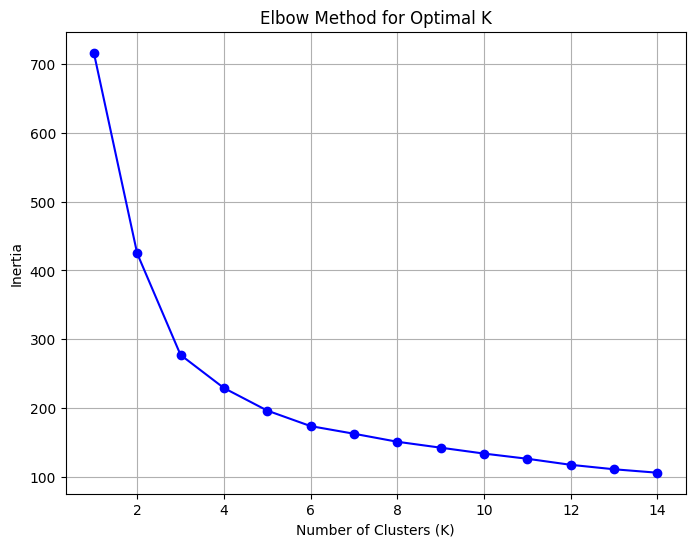

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, t1_inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [21]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean

# 배열 간의 유사성 행렬 생성
similarity_matrix_t1 = np.zeros((len(t1_lst), len(t1_lst)))

for i in range(len(t1_lst)):
    for j in range(i, len(t1_lst)):
        a = t1_lst[i].to_numpy()
        b = t1_lst[j].to_numpy()
        similarity_matrix_t1[i, j] = euclidean(a.ravel(), b.ravel())
        similarity_matrix_t1[j, i] = similarity_matrix_t1[i, j]

# K-Means 클러스터링 적용 (정해진 k 의 개수에 따라 그룹화 진행 후 데이터프레임에 그룹 추가)
kmeans = KMeans(n_clusters=5, random_state=10)
zone_cluster_labels = kmeans.fit_predict(similarity_matrix_t1)

C:\Users\Jeong Hyunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jeong Hyunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
sequence_group = pd.DataFrame(zone_cluster_labels, columns=["zone_group_original"])
grouped_pitcher = pitcher.join(sequence_group)

In [23]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

k_values = range(1, 15)  
t3_inertia = []

for k in k_values:
    
    similarity_matrix_t3 = np.zeros((len(t3_lst), len(t3_lst)))

    for i in range(len(t3_lst)):
        for j in range(i, len(t3_lst)):
            a = t3_lst[i].to_numpy()
            b = t3_lst[j].to_numpy()
            similarity_matrix_t3[i, j] = euclidean(a.ravel(), b.ravel())
            similarity_matrix_t3[j, i] = similarity_matrix_t3[i, j]

    # K-Means 클러스터링 적용
    kmeans = KMeans(n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(similarity_matrix_t3)
    t3_inertia.append(kmeans.inertia_)

C:\Users\Jeong Hyunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jeong Hyunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jeong Hyunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jeong Hyunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

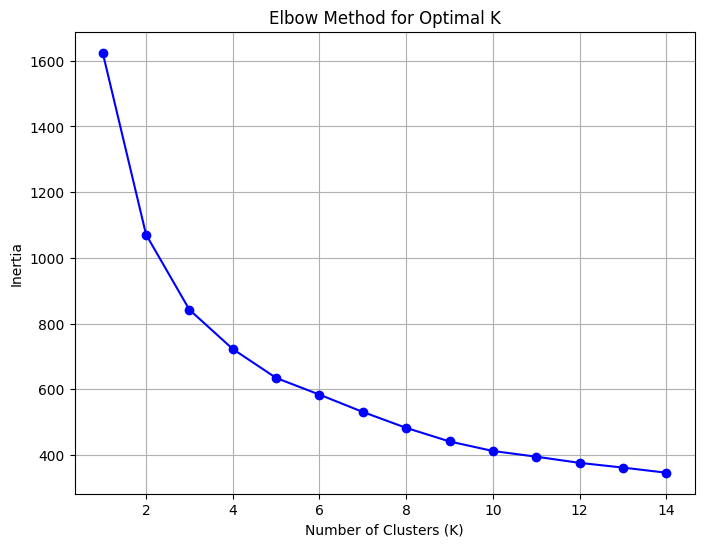

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, t3_inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [25]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

similarity_matrix_t3 = np.zeros((len(t3_lst), len(t3_lst)))

for i in range(len(t3_lst)):
    for j in range(i, len(t3_lst)):
        a = t3_lst[i].to_numpy()
        b = t3_lst[j].to_numpy()
        similarity_matrix_t3[i, j] = euclidean(a.ravel(), b.ravel())
        similarity_matrix_t3[j, i] = similarity_matrix_t3[i, j]

kmeans = KMeans(n_clusters=5, random_state=10)
pitch_type_cluster_labels = kmeans.fit_predict(similarity_matrix_t3)

C:\Users\Jeong Hyunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jeong Hyunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
pitch_type_group = pd.DataFrame(pitch_type_cluster_labels, columns=["pitch_type_group_original"])
grouped_pitcher = grouped_pitcher.join(pitch_type_group)

In [27]:
grouped_pitcher

,pitcher,zone_group_original,pitch_type_group_original
0,"Ashby, Aaron",1,1
1,"Strider, Spencer",0,4
2,"Rogers, Trevor",1,4
3,"Skubal, Tarik",3,2
4,"Wells, Tyler",0,4
...,...,...,...
125,"Cease, Dylan",2,4
126,"Wainwright, Adam",0,1
127,"Alcantara, Sandy",0,3
128,"Cole, Gerrit",0,4


In [28]:
Final = pd.merge(total,grouped_pitcher, left_on ="player_name", right_on ="pitcher", how="left")

In [29]:
Final

,pitch_name,game_date,batter,pitcher_x,player_name,description,zone,stand,p_throws,plate_x,plate_z,inning,pitch_number,team,OBP,BABIP,ERA,pitcher_y,zone_group_original,pitch_type_group_original
0,5,2022-04-17,666185,676879,"Ashby, Aaron",S,3.0,2,1,0.71,2.94,1,1,MIL,0.335,0.325,4.44,"Ashby, Aaron",1,1
1,3,2022-04-17,666185,676879,"Ashby, Aaron",B,13.0,2,1,-1.29,0.84,1,2,MIL,0.335,0.325,4.44,"Ashby, Aaron",1,1
2,3,2022-04-17,666185,676879,"Ashby, Aaron",S,4.0,2,1,-0.40,2.27,1,3,MIL,0.335,0.325,4.44,"Ashby, Aaron",1,1
3,1,2022-04-17,666185,676879,"Ashby, Aaron",S,12.0,2,1,1.15,3.25,1,4,MIL,0.335,0.325,4.44,"Ashby, Aaron",1,1
4,3,2022-04-17,666185,676879,"Ashby, Aaron",G,14.0,2,1,0.84,2.33,1,5,MIL,0.335,0.325,4.44,"Ashby, Aaron",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305863,1,2022-10-05,672695,669203,"Burnes, Corbin",B,14.0,1,2,1.69,1.42,3,2,MIL,0.261,0.259,2.94,"Burnes, Corbin",2,4
305864,4,2022-10-05,672695,669203,"Burnes, Corbin",S,14.0,1,2,0.09,1.36,3,3,MIL,0.261,0.259,2.94,"Burnes, Corbin",2,4
305865,5,2022-10-05,672695,669203,"Burnes, Corbin",B,12.0,1,2,2.09,2.88,3,4,MIL,0.261,0.259,2.94,"Burnes, Corbin",2,4
305866,2,2022-10-05,672695,669203,"Burnes, Corbin",B,13.0,1,2,-0.70,0.84,3,5,MIL,0.261,0.259,2.94,"Burnes, Corbin",2,4


In [29]:
Final.to_csv("realrealfinal.csv", index = False)